In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_wine = pd.read_csv(url, sep=';')
white_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


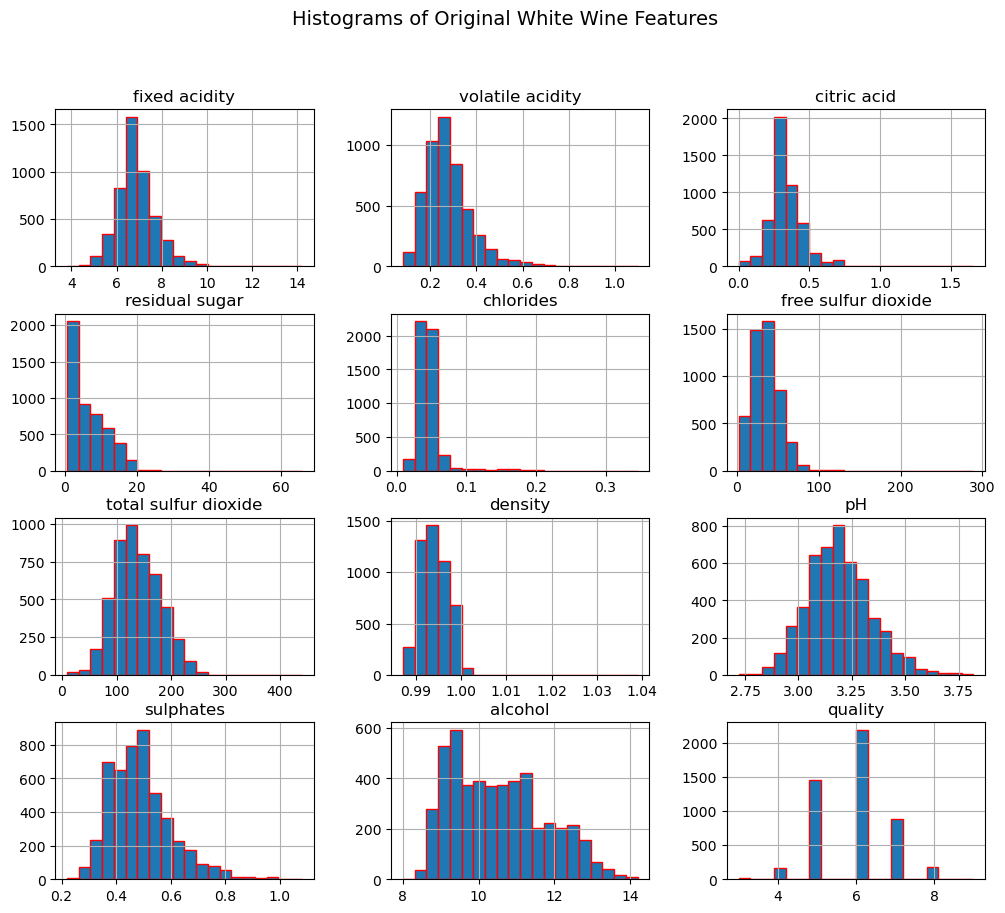

In [9]:
white_wine.hist(figsize=(12,10), bins=20, edgecolor='red')
plt.suptitle("Histograms of Original White Wine Features", fontsize=14)
plt.show()

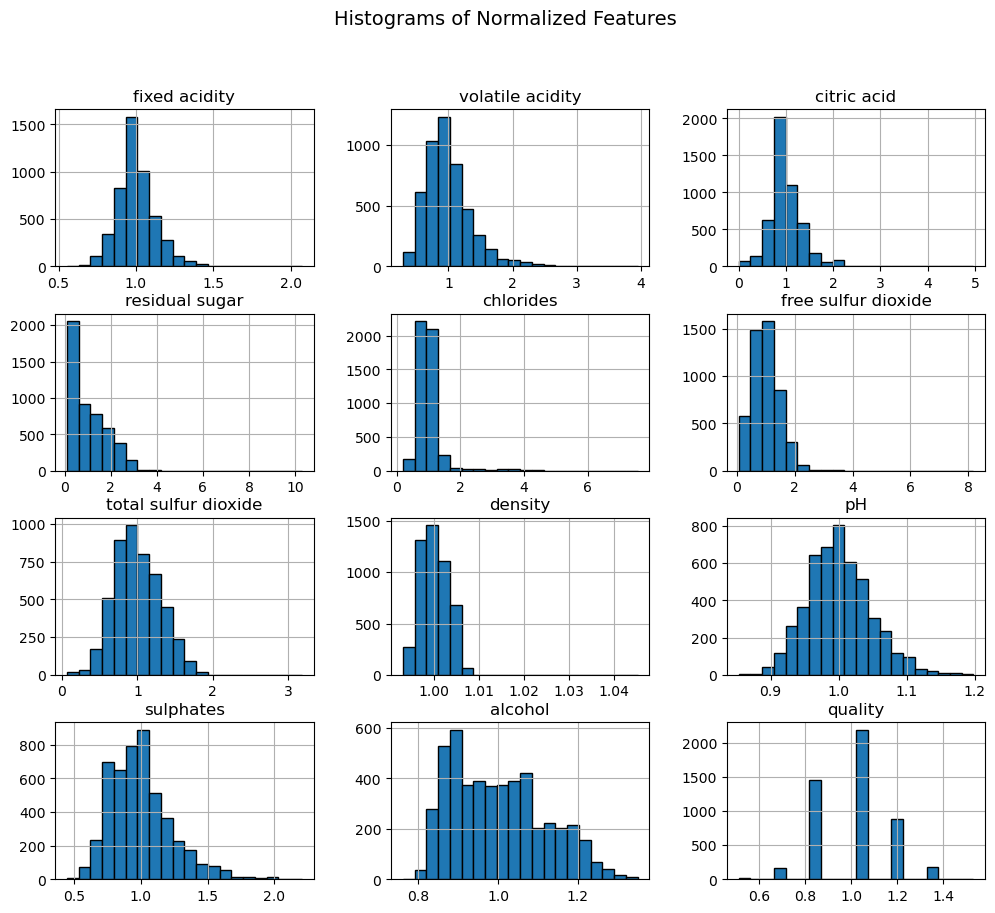

In [10]:
normalized = white_wine / white_wine.mean()
normalized.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Normalized Features", fontsize=14)
plt.show()
#After normalization, all features are centered around similar magnitudes, though their shapes remain roughly the same.

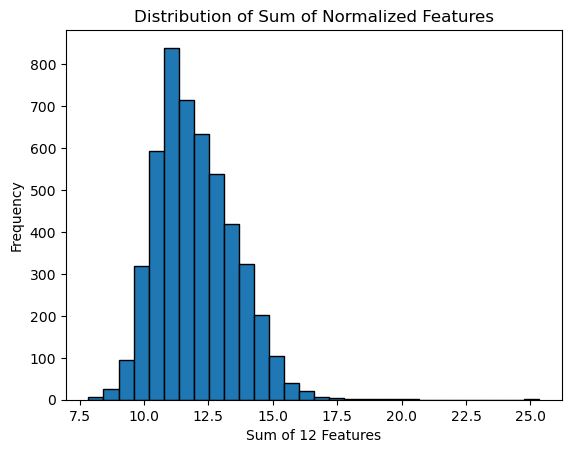

In [4]:
normalized['sum_features'] = normalized.sum(axis=1)

plt.hist(normalized['sum_features'], bins=30, edgecolor='black')
plt.title("Distribution of Sum of Normalized Features")
plt.xlabel("Sum of 12 Features")
plt.ylabel("Frequency")
plt.show()

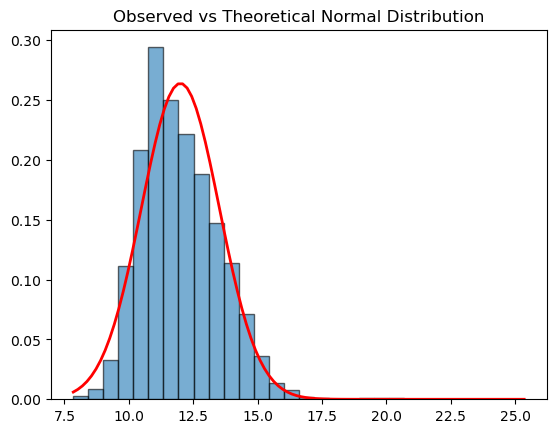

(np.float64(12.0), 2.286312551182294)

In [5]:
mean_sum = normalized['sum_features'].mean()
var_sum = normalized['sum_features'].var()

x = np.linspace(normalized['sum_features'].min(), normalized['sum_features'].max(), 100)
normal_pdf = (1/np.sqrt(2*np.pi*var_sum)) * np.exp(-0.5*((x-mean_sum)**2/var_sum))

plt.hist(normalized['sum_features'], bins=30, density=True, alpha=0.6, edgecolor='black')
plt.plot(x, normal_pdf, 'r', linewidth=2)
plt.title("Observed vs Theoretical Normal Distribution")
plt.show()

mean_sum, var_sum


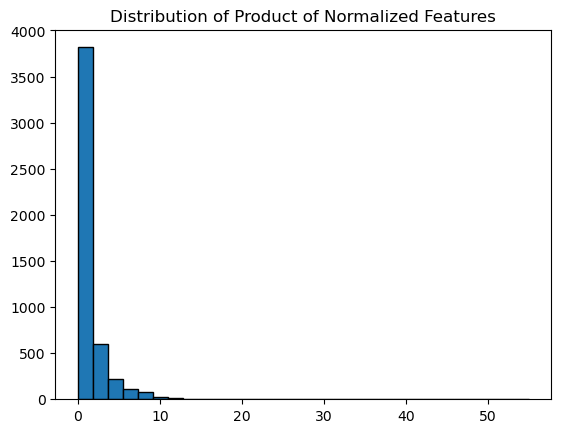

In [6]:
normalized['product_features'] = normalized.drop(columns=['sum_features']).prod(axis=1)

plt.hist(normalized['product_features'], bins=30, edgecolor='black')
plt.title("Distribution of Product of Normalized Features")
plt.show()

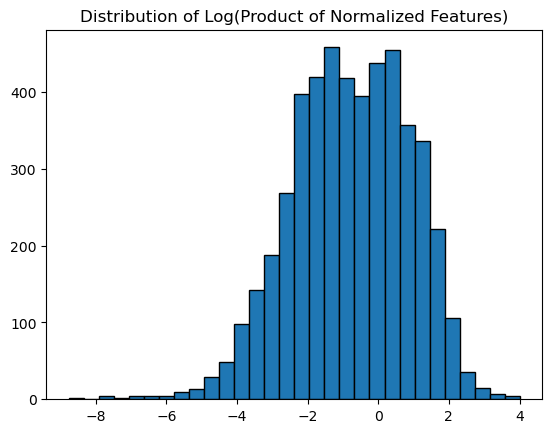

In [7]:
normalized['log_product'] = np.log(normalized['product_features'].replace(0, np.nan)).dropna()

plt.hist(normalized['log_product'], bins=30, edgecolor='black')
plt.title("Distribution of Log(Product of Normalized Features)")
plt.show()